# Image processing

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
cv2.__version__

'4.5.1'

# Reading

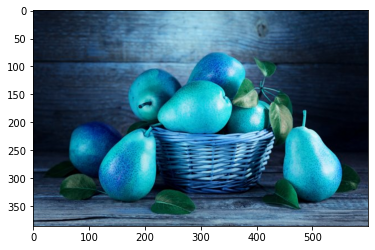

In [23]:
img = cv2.imread("example.jpg")
plt.imshow(img)

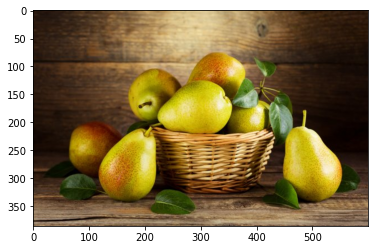

In [28]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

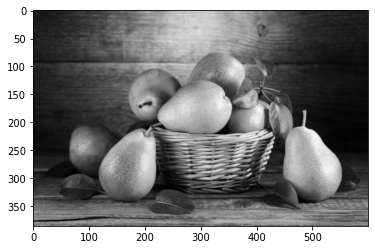

In [27]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, 'gray')

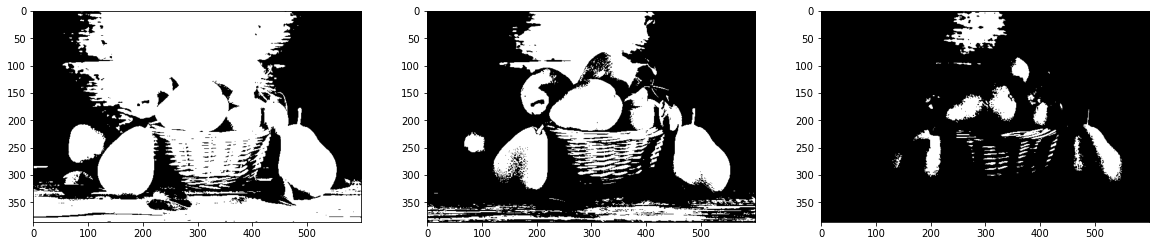

In [110]:
ret,thresh1 = cv2.threshold(gray_img,63,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(gray_img,191,255,cv2.THRESH_BINARY)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,16))
ax1.imshow(thresh1, 'gray')
ax2.imshow(thresh2, 'gray')
ax3.imshow(thresh3, 'gray')

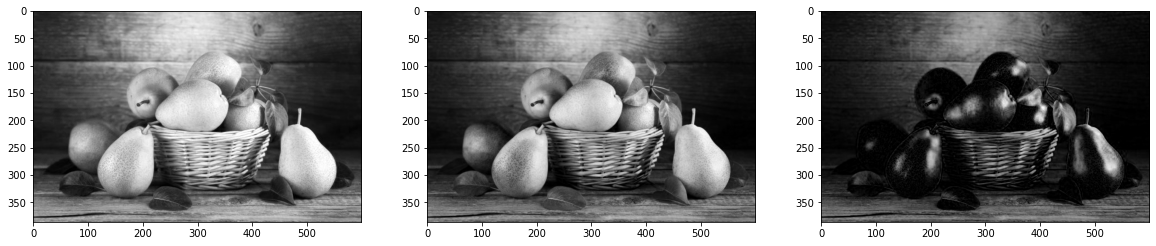

In [48]:
red, green, blue = cv2.split(rgb_img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,16))
ax1.imshow(red, 'gray')
ax2.imshow(green, 'gray')
ax3.imshow(blue, 'gray')

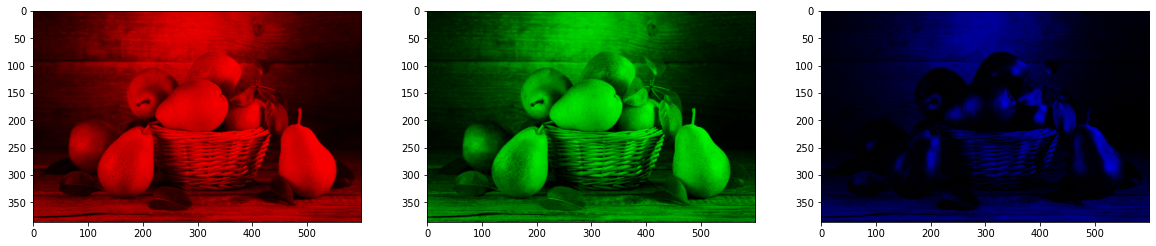

In [67]:
red_channel = np.zeros(img.shape, img.dtype)
green_channel = np.zeros(img.shape, img.dtype)
blue_channel = np.zeros(img.shape, img.dtype)

red, green, blue = cv2.split(rgb_img)
cv2.mixChannels([red, green, blue], [red_channel], [0,0])
cv2.mixChannels([red, green, blue], [green_channel], [1,1])
cv2.mixChannels([red, green, blue], [blue_channel], [2,2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,16))
ax1.imshow(red_channel, 'gray')
ax2.imshow(green_channel, 'gray')
ax3.imshow(blue_channel, 'gray')

# Brightness and contrast

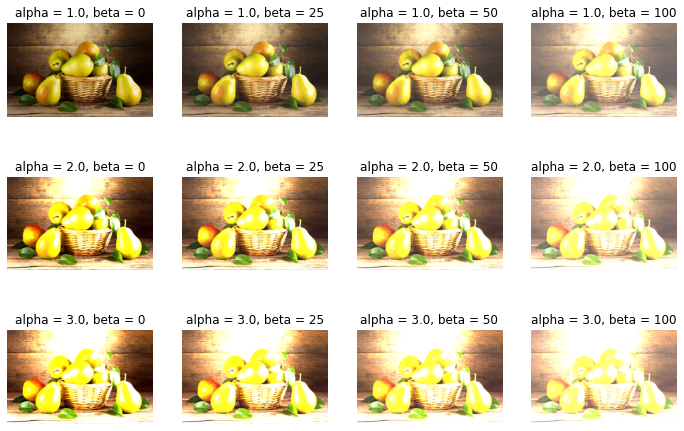

In [64]:
alpha = [1.0, 2.0, 3.0]
beta = [0, 25, 50, 100]

fig, axs = plt.subplots(3,4, figsize = (12,8))
for i, a in enumerate(alpha):
    for j, b in enumerate(beta):
        adj_img = cv2.convertScaleAbs(rgb_img, alpha=a, beta=b)
        axs[i,j].imshow(adj_img)
        axs[i,j].axis('off')
        axs[i,j].set_title(('alpha = %.1f, beta = %d') % (a,b))

# Histogram

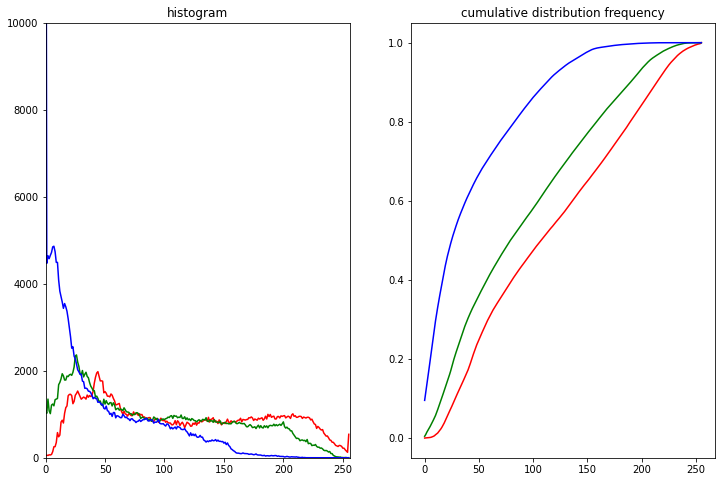

In [77]:
color = ('red', 'green', 'blue')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,8))
for i, color in enumerate(color):
    histogram = cv2.calcHist([rgb_img], [i], None, [256], [0, 256])
    cdf = histogram.cumsum()
    cdf_percent = cdf / cdf.max()
    ax1.plot(histogram, color=color)
    ax2.plot(cdf_percent, color=color)
    ax1.set_title('histogram')
    ax2.set_title('cumulative distribution frequency')
    ax1.set_xlim([0,256])
    ax1.set_ylim([0,10000])

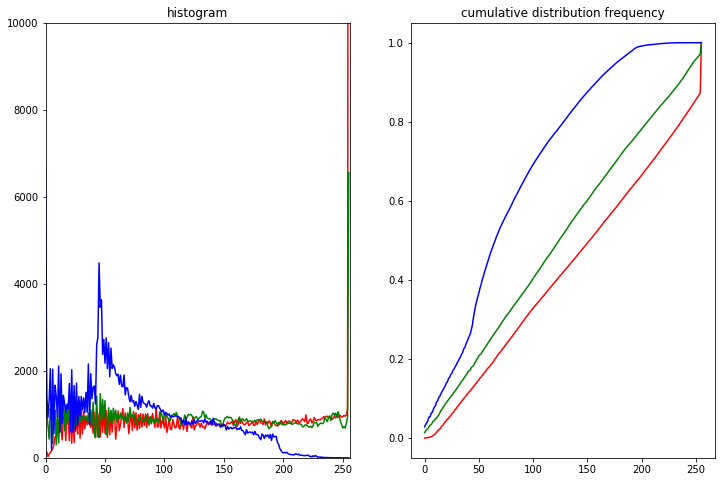

In [90]:
color = ('red', 'green', 'blue')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,8))
ycc_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
ycc_img[:, :, 0] = cv2.equalizeHist(ycc_img[:, :, 0])
eq_rgb_img = cv2.cvtColor(ycc_img, cv2.COLOR_YCrCb2RGB)
for i, color in enumerate(color):
    histogram = cv2.calcHist([eq_rgb_img], [i], None, [256], [0, 256])
    cdf = histogram.cumsum()
    cdf_percent = cdf / cdf.max()
    ax1.plot(histogram, color=color)
    ax2.plot(cdf_percent, color=color)
    ax1.set_title('histogram')
    ax2.set_title('cumulative distribution frequency')
    ax1.set_xlim([0,256])
    ax1.set_ylim([0,10000])

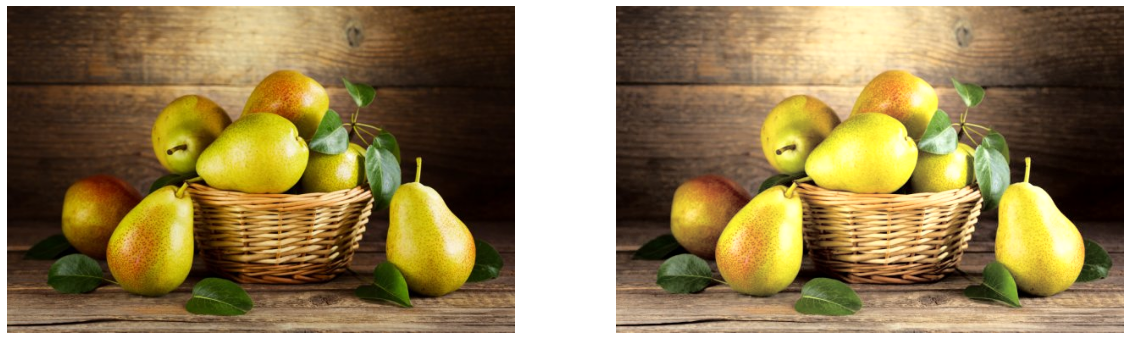

In [99]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 12))
ax1.axis('off')
ax2.axis('off')
ax1.imshow(rgb_img)
ax2.imshow(eq_rgb_img)

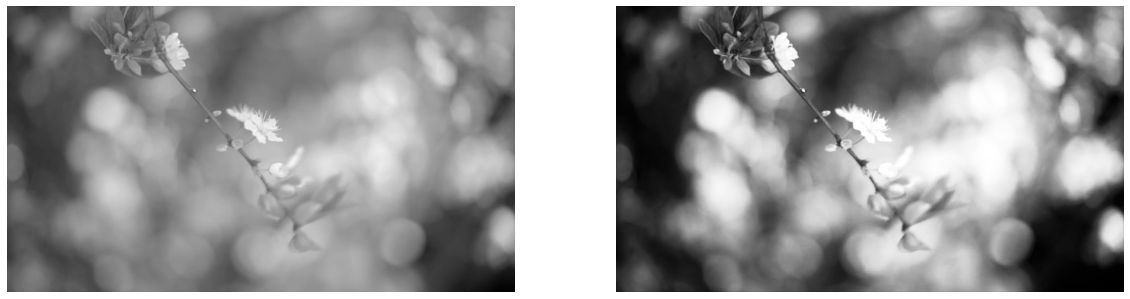

In [100]:
bw_img = cv2.imread('example2.jpeg', 0)

eq_bw_img = cv2.equalizeHist(bw_img)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 12))
ax1.axis('off')
ax2.axis('off')
ax1.imshow(bw_img, 'gray')
ax2.imshow(eq_bw_img, 'gray')

# Image gradients

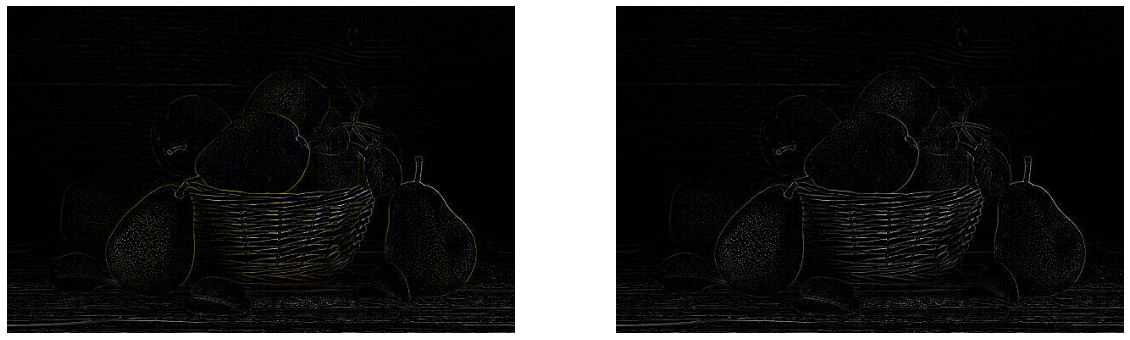

In [104]:
bw_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lap_rgb = cv2.Laplacian(rgb_img, cv2.CV_8UC3)
lap_bw = cv2.Laplacian(bw_img, cv2.CV_8UC3)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 12))
ax1.axis('off')
ax2.axis('off')
ax1.imshow(lap_rgb)
ax2.imshow(lap_bw, 'gray')

# Blurring

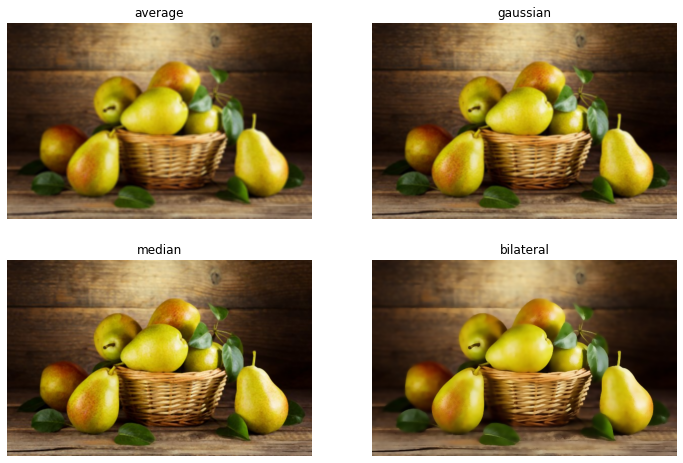

In [117]:
avg_blur = cv2.blur(rgb_img,(5,5))
gauss_blur = cv2.GaussianBlur(rgb_img, (5, 5), 0)
median_blur = cv2.medianBlur(rgb_img, 3)
bilateral_blur = cv2.bilateralFilter(rgb_img,9,75,75)
blurs = [[avg_blur, gauss_blur], [median_blur, bilateral_blur]]
names = [['average', 'gaussian'], ['median', 'bilateral']]

fig, axs = plt.subplots(2,2, figsize = (12, 8))
for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axis('off')
        axs[i,j].imshow(blurs[i][j])
        axs[i,j].set_title(names[i][j])

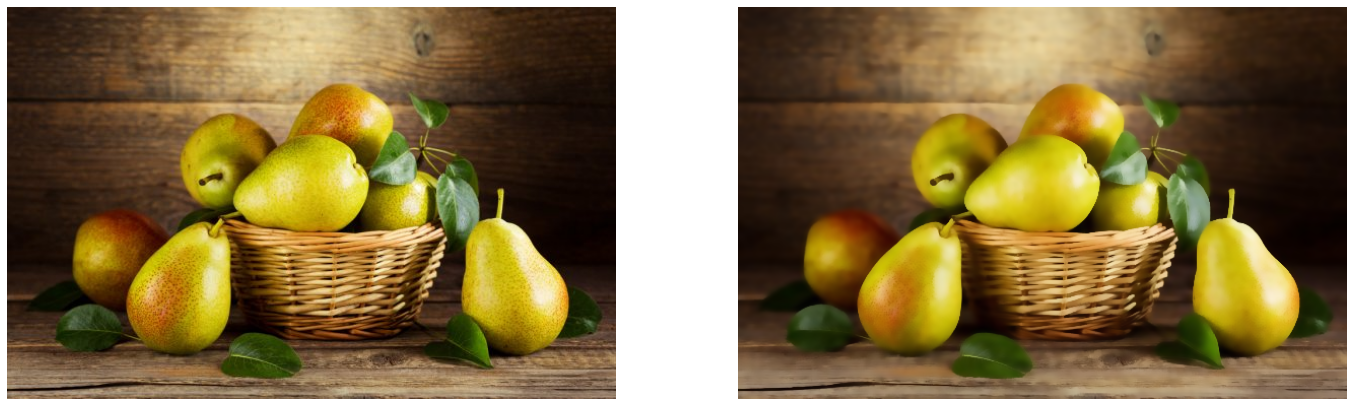

In [122]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 18))
ax1.axis('off')
ax2.axis('off')
ax1.imshow(rgb_img)
ax2.imshow(bilateral_blur)

0.1*img.shape = (39, 60, 3)
0.2*img.shape = (77, 120, 3)
0.3*img.shape = (116, 180, 3)
1.0*img.shape = (386, 600, 3)


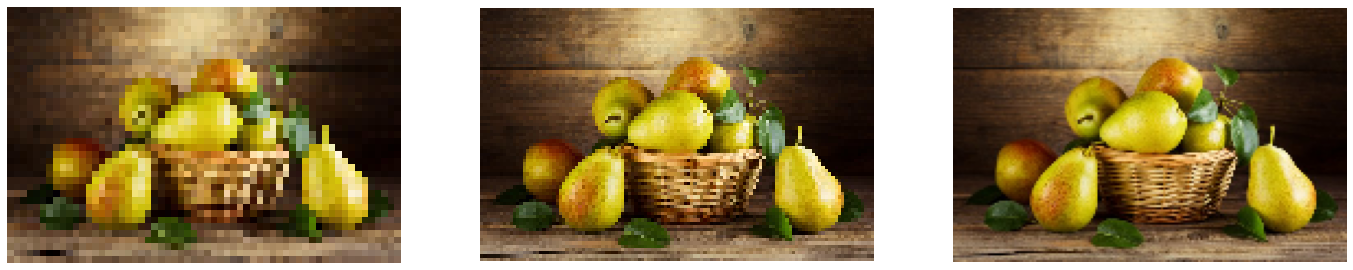

In [138]:
rgb_img_01 = cv2.resize(rgb_img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_CUBIC)
rgb_img_02 = cv2.resize(rgb_img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_CUBIC)
rgb_img_03 = cv2.resize(rgb_img, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_CUBIC)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,16))
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.imshow(rgb_img_01)
ax2.imshow(rgb_img_02)
ax3.imshow(rgb_img_03)
print("0.1*img.shape =", rgb_img_01.shape)
print("0.2*img.shape =", rgb_img_02.shape)
print("0.3*img.shape =", rgb_img_03.shape)
print("1.0*img.shape =", rgb_img.shape)

# Canny

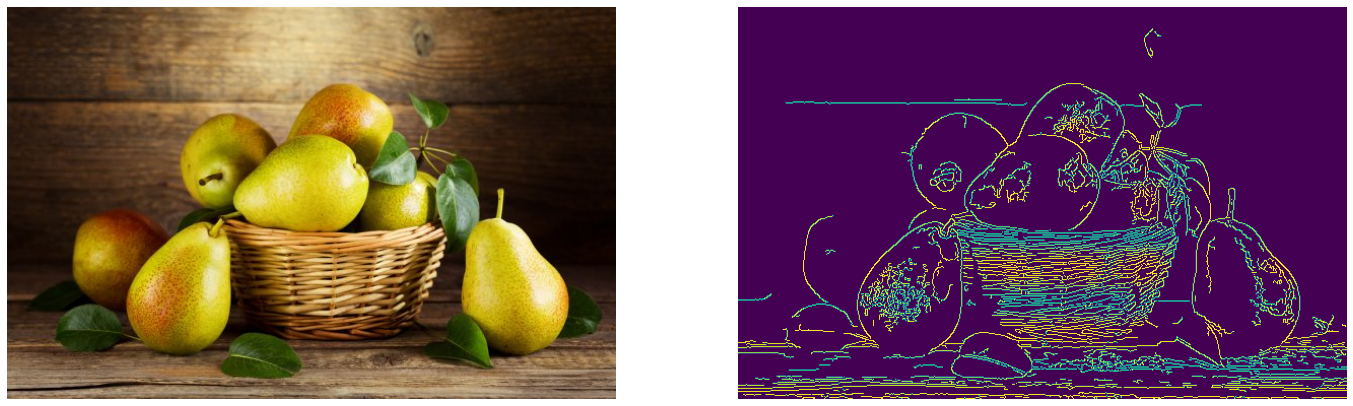

In [148]:
edges = cv2.Canny(rgb_img, 100,200)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 18))
ax1.axis('off')
ax2.axis('off')
ax1.imshow(rgb_img)
ax2.imshow(edges)